# 단어 빈도 그래프

In [1]:
#nltk 패키지 안의 데이터를 활용해 책 제목을 확인
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids()
#파일 제목을 불러온다.

print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('#Num of characters used:', len(doc_alice)) #사용된 문자의 수
print('#Text sample:')
print(doc_alice[:500]) #앞의 500자만 출력

#Num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [3]:
#내용을 확인하고 NLTK을 이용해 토큰화
from nltk.tokenize import word_tokenize
tokens_alice = word_tokenize(doc_alice) #토큰화 실행

print('#Num of tokens used:', len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

#Num of tokens used: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


In [4]:
#포터 스테머로 스테밍하고, 토큰 수와 앞 20개의 토큰을 확인한다.
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

#모든 토큰에 대해 스테밍 실행
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]

print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33494
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


In [6]:
# WordNetLemmatizer를 이용해 표제어를 추출하고, 토큰 수와 앞 20개의 토큰을 스테밍 결과와 비교해본다.
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#모든 토큰에 대해 스테밍 실행
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]

print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33494
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


In [8]:
#정규표현식을 이용한 토큰화
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


* WordTokenizer를 사용했을 때보다 토큰 수가 현저히 줄어든 이유는, ',' 와 같은 부호가 사라졌을 뿐 아니라 2자 이하의 글자들이 모두 제외됐기 때문이다. 

In [10]:
from nltk.corpus import stopwords #일반적으로 분석 대상이 아닌 단어들(불용어 리스트)
english_stops = set(stopwords.words('english')) #반복되지 않게 set으로 변환

#stopwords를 제외한 단어들만으로 리스트 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


In [11]:
# 단어별 빈도 계산
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
    
print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print('#Top 20 high frequency words:')
for key in sorted_word_count[:20]: #빈도 수 상위 20개 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end = ',')

#Num of used words: 2687
#Top 20 high frequency words:
'said': 462,'alice': 385,'little': 128,'one': 98,'know': 88,'like': 85,'went': 83,'would': 78,'could': 77,'thought': 74,'time': 71,'queen': 68,'see': 67,'king': 61,'began': 58,'turtle': 57,"'and": 56,'way': 56,'mock': 56,'quite': 55,

In [12]:
# 품사 태킹을 이용해 의미가 있을 것으로 생각되는 명사, 동사, 형용사만 추출
my_tag_set = ['NN', 'VB','VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]

alice_word_count = dict()
for word in my_words:
    alice_word_count[word] = alice_word_count.get(word,0) +1
    
print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key = alice_word_count.get, reverse = True)

print('#Top 20 high frequency words:')
for key in sorted_word_count[:20]: #빈도 수 상위 20개 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end = ',')

#Num of used words: 1726
#Top 20 high frequency words:
'said': 462,'alice': 293,'little': 124,'went': 83,'time': 71,'queen': 66,'began': 58,'way': 56,'turtle': 56,'mock': 55,'thought': 54,'thing': 49,'voice': 48,'head': 46,'gryphon': 45,'got': 44,'rabbit': 42,'looked': 42,'see': 42,'came': 40,

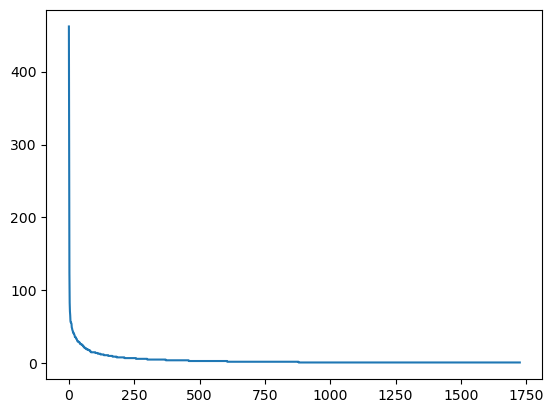

In [13]:
# 시각화
import matplotlib.pyplot as plt
%matplotlib inline

# 정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
w = [alice_word_count[key] for key in sorted_word_count]

plt.plot(w)
plt.show()

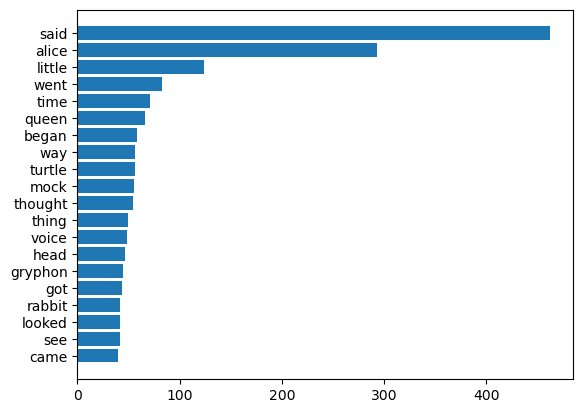

In [14]:
# 수평 막대 그래프 그리기
n = sorted_word_count[:20][::-1] # 빈도 수 상위 20개 단어를 추출해 역순으로 정렬
w = [alice_word_count[key] for key in n] # 20개 단어에 대한 빈도
plt.barh(range(len(n)), w, tick_label = n) # 수평 막대 그래프 
plt.show()

# 워드클라우드로 내용 한눈에 보기

In [15]:
!pip install wordcloud

     ------------------------------------ 153.1/153.1 kB 652.1 kB/s eta 0:00:00


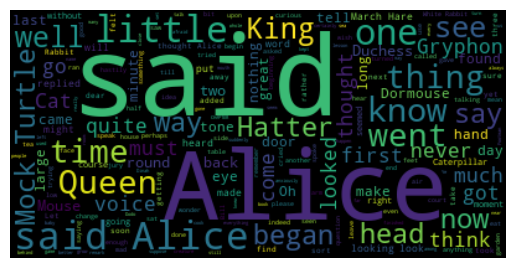

In [16]:
from wordcloud import WordCloud

# 워드클라우드 이미지 생성
wordcloud = WordCloud().generate(doc_alice)

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear') #plt.imshow()는 이미지를 읽어와서 출력하거나 프로그램에서 만든 이미지를 출력할 수 있다.
plt.show()


In [17]:
wordcloud.to_array().shape

(200, 400, 3)

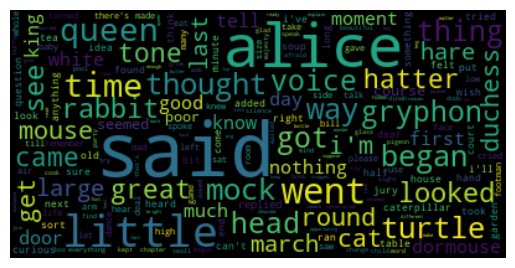

In [18]:
wordcloud = WordCloud(max_font_size = 60).generate_from_frequencies(alice_word_count)
plt.figure()
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

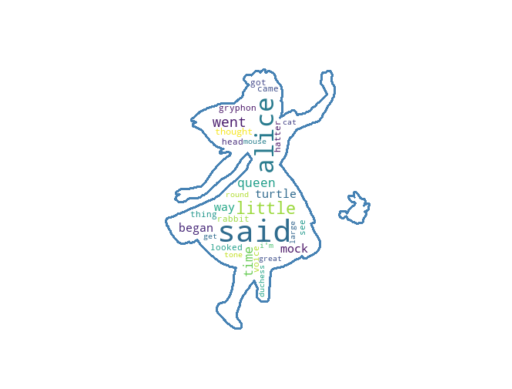

In [23]:
import numpy as np
from PIL import Image

# 배경 이미지를 불러와서 넘파이 array로 변환
alice_mask = np.array(Image.open("alice_mask.png"))
wc = WordCloud(background_color = "white", # 배경색 지정
              max_words = 30,  # 출력할 최대 단어 수
              mask = alice_mask,  # 배경으로 사용할 이미지
              contour_width = 3,  # 테두리 굵기
              contour_color = 'steelblue')  # 테두리 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("alice.png") # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
plt.figure()
plt.axis('off')
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

# 한국어 문서에 대한 그래프와 워드클라우드

In [24]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) # 가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [26]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) # 형태소 단위로 tokenize

print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰:')
print(tokens_const[:100])

#토큰의 수: 8796
#앞 100개의 토큰:
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


In [28]:
# 형태소 단위로 tokenize 후 명사만 추출
tokens_const = t.nouns(const_doc)
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


In [29]:
# 한 글자로 된 명사는 삭제
tokens_const = [token for token in tokens_const if len(token) > 1]
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


[('조직', 18), ('국회의원', 18), ('임기', 18), ('직무', 19), ('국무총리', 19), ('자유', 20), ('정부', 20), ('선거', 20), ('임명', 20), ('권리', 21), ('의원', 21), ('사항', 23), ('기타', 26), ('모든', 37), ('헌법', 53), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('법률', 127)]


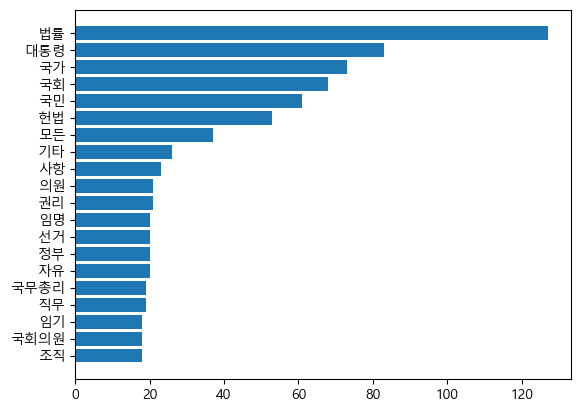

In [36]:
from matplotlib import font_manager, rc
import platform

font_name = font_manager.FontProperties(fname = "c:/windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1
    
def word_graph(cnt, max_words = 10):
    
    sorted_w = sorted(cnt.items(), key = lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n,w = zip(*sorted_w[-max_words:])
    
    plt.barh(range(len(n)), w, tick_label = n)
    plt.savefig('bar.png')
    plt.show()

word_graph(const_cnt, max_words = 20)

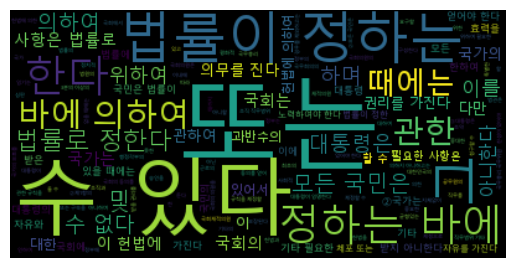

In [37]:
font_path = 'c:/Windows/Fonts/malgun.ttf'

wordcloud = WordCloud(font_path = font_path).generate(const_doc)

plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.show()

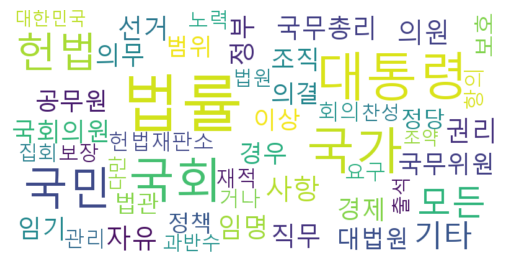

In [38]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #원문이 아닌 형태소 분석 결과로부터 워드클라우드를 생성
wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()